In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from truncation import get_truncation
import numpy as np

In [103]:
# %matplotlib widget
%matplotlib inline

In [104]:
FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]
CUTOFF = [400, 450, 500, 550]

plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }

trunc_colors = {
    "NLO": "bisque",
    "N2LO": "limegreen",
    "N3LO": "dodgerblue",
    "N4LO": "red",
    "N4LO+": "black",
}

marker_common = {"markersize": 6, "elinewidth": 0.9, "capsize": 2.5}


In [105]:
def relative_diff(*args):
    return (max(args) - min(args))/np.mean(args)

In [106]:
# src0 = "He_photodis/newdata/"
# src = "He_photodis/HE_2"
forces = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]

## ppn

### Exclusive

In [107]:
df_3NF = pd.read_csv("./He_photodis/configurations_data.csv")
df = pd.read_csv("./He_photodis/configurations_data_2NF.csv")

In [108]:
configs = df["CONFIG"].unique()
configs[0]

'105_135_105_45'

#### TRUNCATION

##### 75_75_75_105

In [109]:
df1 = df[df["CONFIG"] == "75_75_75_105"]
df3 = df_3NF[df_3NF["CONFIG"] == "75_75_75_105"]

In [110]:
df_tmp = df1[(df1.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)

df_trunc1 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/2712981544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

In [111]:
df_tmp = df3[(df3.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)
df_piv["LO"] = df_piv["N2LO"]
df_piv["NLO"] = df_piv["N2LO"]

df_trunc3 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/3865852309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

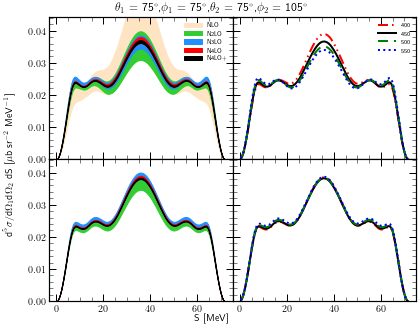

In [112]:
fig = plt.figure(figsize=(6, 5))
gs = fig.add_gridspec(ncols=2, nrows=2, wspace=0, hspace=0)
axes = gs.subplots(sharey=True, sharex=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")), y=0.95)
fig.supylabel("$\\text{d}^5\sigma/\\text{d}\Omega _1 \\text{d}\Omega _2$ dS [$\mu$b sr$^{-2}$ MeV$^{-1}$]", size=10)
fig.supxlabel("S [MeV]", size=10, y=0.06)

for force in FORCES[1:]:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc1[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc1[force].values), label=force,
                            color=trunc_colors[force])
    if force == "NLO":
        continue
    df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == force) ]
    axes[1][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc3[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc3[force].values), label=force,
                            color=trunc_colors[force])
for cut in CUTOFF:
    df_tmp =  df3[(df3["CUTOFF"]==cut)
                   & (df3["FORCE"] == "N4LO+") ]
    axes[1][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[0][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes.flatten()):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, 10**4*df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N2LO")]["CROSS"].max()*1.2])
    # ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    if j < 2:
        ax.legend(fontsize=6, handlelength=3)
fig.tight_layout()
plt.savefig(f"Figures_HE/CROSS_excl_trunc_100mev_{df3.CONFIG.values[0]}_2NF_3NF.pdf", dpi=300, facecolor="white")

In [113]:
order="N4LO+"
df_tmp = df1[(df1.FORCE == order) &
                    (df1.CUTOFF == 450) &
                    (df1.Energy == 100)][["SLANGE", "CROSS"]]
df_tmp["CROSS+"] = df_tmp["CROSS"] + df_trunc1[order].values
df_tmp["CROSS-"] = df_tmp["CROSS"] - df_trunc1[order].values

In [114]:
(df_tmp[["CROSS-", "CROSS+"]].apply(lambda x: relative_diff(*x), axis=1)*100)\
            .sort_values(ascending=False).loc[238571]

2.3663031979557094

In [115]:
order="N4LO+"
df_tmp = df3[(df3.FORCE == order) &
                    (df3.CUTOFF == 450) &
                    (df3.Energy == 100)][["SLANGE", "CROSS"]]
df_tmp["CROSS+"] = df_tmp["CROSS"] + df_trunc[order].values
df_tmp["CROSS-"] = df_tmp["CROSS"] - df_trunc[order].values

NameError: name 'df_trunc' is not defined

In [ ]:
df_tmp[df_tmp["SLANGE"] == 35.001]

,SLANGE,CROSS,CROSS+,CROSS-
238776,35.001,0.000004,0.000004,0.000004


In [ ]:
(df_tmp[["CROSS-", "CROSS+"]].apply(lambda x: relative_diff(*x), axis=1)*100)\
            .sort_values(ascending=False).loc[238776]

1.1120656502952189

In [ ]:
df_tmp = df1[(df1.FORCE == "N4LO+") &
                    (df1.Energy == 100)]
reldif2 = df_tmp.pivot(index="SLANGE", columns="CUTOFF")["CROSS"].apply(lambda x: relative_diff(*x), axis=1)*100

In [ ]:
reldif2.loc[35.001]

13.7271214642263

In [ ]:
df_tmp = df3[(df3.FORCE == "N4LO+") &
                    (df3.Energy == 100)]
reldif2 = df_tmp.pivot(index="SLANGE", columns="CUTOFF")["CROSS"].apply(lambda x: relative_diff(*x), axis=1)*100

In [ ]:
reldif2.loc[35.001]

1.225953700684701

##### 15_105_15_75

In [116]:
df1 = df[df["CONFIG"] == "15_105_15_75"]
df3 = df_3NF[df_3NF["CONFIG"] == "15_105_15_75"]

In [117]:
df_tmp = df1[(df1.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)

df_trunc1 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/2712981544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

In [118]:
df_tmp = df3[(df3.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)
df_piv["LO"] = df_piv["N2LO"]
df_piv["NLO"] = df_piv["N2LO"]

df_trunc3 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/3865852309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

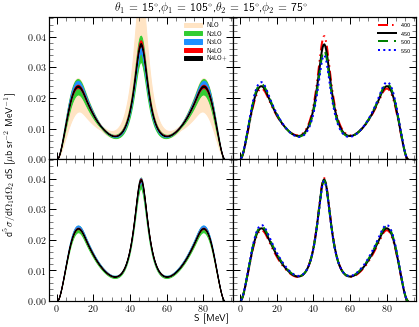

In [119]:
fig = plt.figure(figsize=(6, 5))
gs = fig.add_gridspec(ncols=2, nrows=2, wspace=0, hspace=0)
axes = gs.subplots(sharey=True, sharex=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")), y=0.95)
fig.supylabel("$\\text{d}^5\sigma/\\text{d}\Omega _1 \\text{d}\Omega _2$ dS [$\mu$b sr$^{-2}$ MeV$^{-1}$]", size=10)
fig.supxlabel("S [MeV]", size=10, y=0.06)

for force in FORCES[1:]:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc1[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc1[force].values), label=force,
                            color=trunc_colors[force])
    if force == "NLO":
        continue
    df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == force) ]
    axes[1][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc3[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc3[force].values), label=force,
                            color=trunc_colors[force])
for cut in CUTOFF:
    df_tmp =  df3[(df3["CUTOFF"]==cut)
                   & (df3["FORCE"] == "N4LO+") ]
    axes[1][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[0][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes.flatten()):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, 10**4*df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N2LO")]["CROSS"].max()*1.2])
    # ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    if j < 2:
        ax.legend(fontsize=6, handlelength=3)
fig.tight_layout()
plt.savefig(f"Figures_HE/CROSS_excl_trunc_100mev_{df3.CONFIG.values[0]}_2NF_3NF.pdf", dpi=300, facecolor="white")

##### 45_75_45_105

In [134]:
df1 = df[df["CONFIG"] == "45_75_45_105"]
df3 = df_3NF[df_3NF["CONFIG"] == "45_75_45_105"]

In [135]:
df_tmp = df1[(df1.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)

df_trunc1 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/2712981544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

In [136]:
df_tmp = df3[(df3.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)
df_piv["LO"] = df_piv["N2LO"]
df_piv["NLO"] = df_piv["N2LO"]

df_trunc3 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/3865852309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

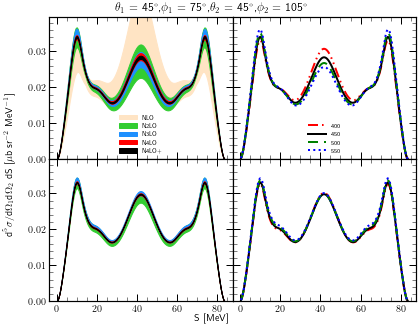

In [137]:
fig = plt.figure(figsize=(6, 5))
gs = fig.add_gridspec(ncols=2, nrows=2, wspace=0, hspace=0)
axes = gs.subplots(sharey=True, sharex=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")), y=0.95)
fig.supylabel("$\\text{d}^5\sigma/\\text{d}\Omega _1 \\text{d}\Omega _2$ dS [$\mu$b sr$^{-2}$ MeV$^{-1}$]", size=10)
fig.supxlabel("S [MeV]", size=10, y=0.06)

for force in FORCES[1:]:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc1[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc1[force].values), label=force,
                            color=trunc_colors[force])
    if force == "NLO":
        continue
    df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == force) ]
    axes[1][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc3[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc3[force].values), label=force,
                            color=trunc_colors[force])
for cut in CUTOFF:
    df_tmp =  df3[(df3["CUTOFF"]==cut)
                   & (df3["FORCE"] == "N4LO+") ]
    axes[1][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[0][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes.flatten()):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, 10**4*df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N2LO")]["CROSS"].max()*1.2])
    # ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    if j < 2:
        ax.legend(fontsize=6, handlelength=3, loc="lower center")
fig.tight_layout()
plt.savefig(f"Figures_HE/CROSS_excl_trunc_100mev_{df3.CONFIG.values[0]}_2NF_3NF.pdf", dpi=300, facecolor="white")

##### 165_15_15_165

In [138]:
df1 = df[df["CONFIG"] == "165_15_15_165"]
df3 = df_3NF[df_3NF["CONFIG"] == "165_15_15_165"]

In [139]:
df_tmp = df1[(df1.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)

df_trunc1 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/2712981544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

In [140]:
df_tmp = df3[(df3.CUTOFF == 450)]
df_tmp.sort_values("SLANGE", inplace=True)
df_piv = df_tmp.pivot(index="SLANGE", columns="FORCE")[
    "CROSS"].reindex(FORCES, axis=1)
df_piv["LO"] = df_piv["N2LO"]
df_piv["NLO"] = df_piv["N2LO"]

df_trunc3 = get_truncation(df_piv, 100, Lambda=650)

/tmp/ipykernel_1121374/3865852309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values("SLANGE", inplace=True)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxdiff.append(df_diff[FORCES[force_num-1]]*EPSILON)
/home/vitalii/Jagielllonian_work/THESIS/thesis/PlotData/truncation.py:65: FutureWarning: The series.append method is deprecated and will be removed from panda

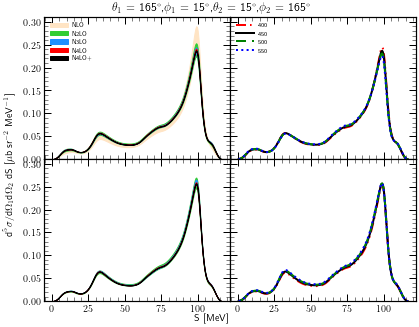

In [141]:
fig = plt.figure(figsize=(6, 5))
gs = fig.add_gridspec(ncols=2, nrows=2, wspace=0, hspace=0)
axes = gs.subplots(sharey=True, sharex=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")), y=0.95)
fig.supylabel("$\\text{d}^5\sigma/\\text{d}\Omega _1 \\text{d}\Omega _2$ dS [$\mu$b sr$^{-2}$ MeV$^{-1}$]", size=10)
fig.supxlabel("S [MeV]", size=10, y=0.06)

for force in FORCES[1:]:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc1[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc1[force].values), label=force,
                            color=trunc_colors[force])
    if force == "NLO":
        continue
    df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == force) ]
    axes[1][0].fill_between(df_tmp.SLANGE, 10**4*(df_tmp["CROSS"].values+df_trunc3[force].values),
                            10**4*(df_tmp["CROSS"].values-df_trunc3[force].values), label=force,
                            color=trunc_colors[force])
for cut in CUTOFF:
    df_tmp =  df3[(df3["CUTOFF"]==cut)
                   & (df3["FORCE"] == "N4LO+") ]
    axes[1][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[0][1].plot(df_tmp["SLANGE"], 10**4*df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes.flatten()):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, 10**4*df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N2LO")]["CROSS"].max()*1.2])
    # ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    if j < 2:
        ax.legend(fontsize=6, handlelength=3, loc="upper left")
fig.tight_layout()
plt.savefig(f"Figures_HE/CROSS_excl_trunc_100mev_{df3.CONFIG.values[0]}_2NF_3NF.pdf", dpi=300, facecolor="white")

#### ORDER

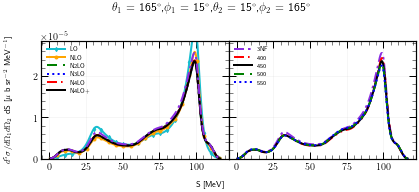

In [128]:
fig = plt.figure(figsize=(6, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
axes = gs.subplots(sharey=True)
fig.suptitle("$\\theta_1$ = {}$^\circ$,"
             "$\\phi_1$ = {}$^\circ$,"
             "$\\theta_2$ = {}$^\circ$,"
             "$\\phi_2$ = {}$^\circ$".format(*df1["CONFIG"].values[0].split("_")))
# fig.supylabel("d\sigma", x=0.03, y=0.6, size=12)
fig.supylabel("$d^5\sigma/d\Omega _1 d\Omega _2$ dS [$\mu$ b sr$^{-2}$ MeV$^{-1}$]", size=8)
fig.supxlabel("S [MeV]", size=8, y=0.06)

for force in FORCES:
    df_tmp =  df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == force) ]
    axes[0].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles[force], label=force)
df_tmp =  df3[(df3["CUTOFF"]==450)
                   & (df3["FORCE"] == "N4LO+") ]
axes[0].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles["AV18"])
axes[1].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **line_styles["AV18"], label="3NF")
for cut in CUTOFF:
    df_tmp =  df1[(df1["CUTOFF"]==cut)
                   & (df1["FORCE"] == "N4LO+") ]
    axes[1].plot(df_tmp["SLANGE"], df_tmp["CROSS"], **ls_cutoff[cut], label=cut)
for j, ax in enumerate(axes):
    ax.tick_params(which='minor', direction='in', length=4,
                   width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True, zorder=1)
    ax.set_ylim([0, df1[(df1["CUTOFF"]==450)
                   & (df1["FORCE"] == "NLO")]["CROSS"].max()*1.1])
    ax.grid(alpha=0.2)
    ax.set_zorder(-1)
    ax.legend(fontsize=6, handlelength=3)
plt.tight_layout()
# plt.savefig(f"Figures_HE/CROSS_excl_100mev_{df1.CONFIG.values[0]}.pdf", dpi=300, facecolor="white")

In [129]:
df_g = df.groupby(["CONFIG", "SLANGE"])["CROSS"].agg(["min", "max", "std"])

In [130]:
(df_g["max"] - df_g["min"]).groupby(level=[0]).max().sort_values(ascending=False)[:10]

CONFIG
165_165_15_15    0.000010
165_15_15_165    0.000010
15_15_165_165    0.000010
15_165_165_15    0.000010
45_75_45_105     0.000008
45_105_45_75     0.000008
75_75_75_105     0.000007
75_105_75_75     0.000007
15_105_15_75     0.000006
15_75_15_105     0.000006
dtype: float64

In [131]:
df_g.groupby(level=[0])["std"].sum().sort_values(ascending=False)

CONFIG
45_75_45_105      0.000129
45_105_45_75      0.000129
165_165_15_15     0.000111
165_15_15_165     0.000111
15_15_165_165     0.000111
                    ...   
165_135_165_45    0.000008
135_45_165_135    0.000008
135_135_165_45    0.000008
165_45_135_135    0.000008
165_135_135_45    0.000008
Name: std, Length: 216, dtype: float64